In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df=pd.read_csv('spam.csv',encoding='latin1')

In [17]:
df

,target,text,num_character,word_count,sent_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [4]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [5]:
df.duplicated().sum()

403

In [6]:
df.drop_duplicates(keep='first',inplace=True)

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
encoder=LabelEncoder()

In [9]:
df['v1']=encoder.fit_transform(df['v1'])

In [10]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [11]:
df['num_character']=df['text'].apply(len)

In [12]:
import nltk

In [42]:
from nltk.corpus import stopwords

In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avinash\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
nitk.download('puntk')

In [14]:
df['word_count']=df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [15]:
df['sent_count']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

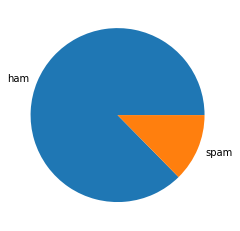

In [16]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'])
plt.show()

In [18]:
df.head(1)

,target,text,num_character,word_count,sent_count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2


In [45]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [36]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [46]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return ' '.join(y)

In [49]:
transform_text('hello %% MY loved @@ IS AVI%NASH')

'hello love avi nash'

In [52]:
df['transformed_text']=df['text'].apply(transform_text)

In [53]:
df

,target,text,num_character,word_count,sent_count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [54]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [55]:
cv=CountVectorizer()

In [56]:
tfidf=TfidfVectorizer(max_features=3000)

In [59]:
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [60]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
y=df['target'].values

In [62]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [65]:
from sklearn.naive_bayes import MultinomialNB

In [66]:
mnb=MultinomialNB()

In [67]:
mnb.fit(x_train,y_train)

MultinomialNB()

In [68]:
mnb.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [69]:
import pickle

In [70]:
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model_mnb.pkl','wb'))